
## Data Mining, BI-VZD
## Home Assignment 2 - Titanic
## Part 1 + 2 - PreProcessing + Decision tree
### Bc. Jiří Zelenke
### UK-FSV-IES

#### Start: 8.11.2019 21:45
#### SUb-Finished: 10.11. 23:00
-----------------------------------------------------

####################################################################################

## Content:

<a id='1_Introductory'></a>
[1_Introductory](#1_Introductory)

 * <a id='1.1_Import_of_Packages'></a>
[1.1_Import_of_Packages](#1.1_Import_of_Packages)

 * <a id='1.2_Loading_Data'></a>
[1.2_Loading_Data](#1.2_Loading_Data)

 * <a id='1.3_Some_of_the_stories:'></a>
[1.3_Some_of_the_stories:](#1.3_Some_of_the_stories:)


<a id='2_Arrangements'></a>
[2_Arrangements](#2_Arrangements)

* <a id='2.1_Missing_values'></a>
[2.1_Missing_values](#2.1_Missing_values)

 * <a id='2.1.1_Missing_Fare'></a>
[2.1.1_Missing_Fare](#2.1.1_Missing_Fare)

 * <a id='2.1.2_Missing_Embarked'></a>
[2.1.2_Missing_Embarked](#2.1.2_Missing_Embarked)

 * <a id='2.1.3_Dealing_with_missing_Age'></a>
[2.1.3_Dealing_with_missing_Age](#2.1.3_Dealing_with_missing_Age)

 * <a id='2.1.4_Final_Check_of_NaNs'></a>
[2.1.4_Final_Check_of_NaNs](#2.1.4_Final_Check_of_NaNs)


* <a id='2.2_Adding_Variables'></a>
[2.2_Adding_Variables](#2.2_Adding_Variables)

 * <a id='2.2.1_Familysize'></a>
[2.2.1_Familysize](#2.2.1_Familysize)

 * <a id='2.2.2_Age_category'></a>
[2.2.2_Age_category](#2.2.2_Age_category)


* <a id='2.3_Data_Types'></a>
[2.3_Data_Types](#2.3_Data_Types)

* <a id='2.4_Dropping_Variables'></a>
[2.4_Dropping_Variables](#2.4_Dropping_Variables)


<a id='3_Histograms,Probabilities,Correlations'></a>
[3_Histograms,Probabilities,Correlations](#3_Histograms,Probabilities,Correlations)

* <a id='3.1_Histograms'></a>
[3.1_Histograms](#3.1_Histograms)

* <a id='3.2_Probabilities'></a>
[3.2_Probabilities](#3.2_Probabilities)

* <a id='3.3_Correlations'></a>
[3.3_Correlations](#3.3_Correlations)

<a id='4_Model'></a>
[4_Model](#4_Model)

* <a id='1.1_Train_and_Test'></a>
[4.1_Train_and_Test](#4.1_Train_and_Test)

* <a id='4.2_Results'></a>
[4.2_Results](#4.2_Results)

<a id='5_Predictions_of_Results'></a>
[5_Predictions_of_Results](#5_Predictions_of_Results)

* <a id='5.1_Loading_Data'></a>
[5.1_Loading_Data](#5.1_Loading_Data)

* <a id='5.2_Missing_Values'></a>
[5.2_Missing_Values](#5.2_Missing_Values)

* <a id='5.3_Adding_Variables'></a>
[5.3_Adding_Variables](#5.3_Adding_Variables)

* <a id='5.4_Predictions'></a>
[5.4_Predictions](#5.4_Predictions)

########################################################################################################################################################################

## 1_Introductory



(...)

#### Seznam příznaků:

* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

  * vhodný klasifikační model z přednášek. hyperparametry a určete jeho přesnost (accuracy) na trénovací množině (??). Také určete jeho přesnost na testovací
  
  * Načtěte vyhodnocovací data ze souboru **evaluation.csv**. Napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte **results.csv** soubor, ve kterém tyto predikce uložíte do dvou sloupců: ID, predikce přežití. Tento soubor nahrajte do repozitáře.

  * (až +4 body) Aplikujte všechny klasifikační modely z přednášek a určete (na základě přesnosti na validační množině), který je nejlepší. Přesnost tohoto nejlepšího modelu odhadněte pomocí testovací množiny. K predikcím na vyhodnocovacích datech využijte tento model.
  * (až +4 body) Zkuste použít nějaké (alespoň dvě) netriviální metody doplňování chybějících hodnot u věku. Zaměřte na vliv těchto metod na přesnost predikce výsledného modelu. K predikcím na vyhodnocovacích datech využijte ten přístup, který Vám vyjde jako nejlepší.

  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) s predikcemi pro vyhodnocovací data.


### 1.1_Import_of_Packages

In [1]:
import pandas as pd # for dataframe
import numpy as np # for arrays

from collections import Counter                    # Na počítání prvků v dimenzi  
import matplotlib.pyplot as plt                    # Na tvorbu základních grafů
from pandas import DataFrame                       # Na tvorbu nových prázdných dataframů
import random                                      # ---
import seaborn as sns                              # Na některé specifické grafy
#-----------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split    # To create Train and Test sets
from sklearn.tree import DecisionTreeClassifier         # To apply descision tree model

### 1.2_Loading_Data

In [2]:
data = pd.read_csv (r'data.csv')

In [3]:
display(data.describe())
data.head()

,ID,survived,pclass,age,sibsp,parch,fare
count,1000.000000,1000.000000,1000.000000,799.000000,1000.00000,1000.000000,999.000000
mean,499.500000,0.400000,2.287000,29.827180,0.47600,0.367000,33.625233
std,288.819436,0.490143,0.837456,14.441849,1.01215,0.843221,50.712570
min,0.000000,0.000000,1.000000,0.166700,0.00000,0.000000,0.000000
25%,249.750000,0.000000,2.000000,21.000000,0.00000,0.000000,7.895800
50%,499.500000,0.000000,3.000000,28.000000,0.00000,0.000000,14.458300
75%,749.250000,1.000000,3.000000,39.000000,1.00000,0.000000,31.275000
max,999.000000,1.000000,3.000000,80.000000,8.00000,9.000000,512.329200


,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S,NaN
1,1,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
2,2,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C,"Dowagiac, MI"
3,3,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C,NaN
4,4,0,3,"Fox, Mr. Patrick",male,NaN,0,0,368573,7.7500,NaN,Q,"Ireland New York, NY"


### 1.3_Some_of_the_stories:

#### 1.) Dean, Miss. Elizabeth Gladys "Millvina"	 - youngest person on ship (born 1912) , suvived, lived till 2009
* She survived alongside woth her mother and brother, father died - but he is not in our dataset
*  https://cs.wikipedia.org/wiki/Millvina_Dean 

#### 2.) Goodwin Family - all 8 people died
* https://www.encyclopedia-titanica.org/titanic-victim/augusta-goodwin.html

#### 3. Sage family - biggest family, all 11 people died
* https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [4]:
# Youngest passangers

data[data["age"]<20].sort_values(by='age', ascending=True).head(15)

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
759,759,1,3,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.5750,NaN,S,"Devon, England Wichita, KS"
157,157,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.3333,0,2,347080,14.4000,NaN,S,"Stanton, IA"
567,567,1,2,"Hamalainen, Master. Viljo",male,0.6667,1,1,250649,14.5000,NaN,S,"Detroit, MI"
374,374,1,3,"Baclini, Miss. Eugenie",female,0.7500,2,1,2666,19.2583,NaN,C,"Syria New York, NY"
706,706,0,3,"Peacock, Master. Alfred Edward",male,0.7500,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN
729,729,1,3,"Baclini, Miss. Helene Barbara",female,0.7500,2,1,2666,19.2583,NaN,C,"Syria New York, NY"
486,486,1,3,"Aks, Master. Philip Frank",male,0.8333,0,1,392091,9.3500,NaN,S,"London, England Norfolk, VA"
838,838,1,2,"Richards, Master. George Sibley",male,0.8333,1,1,29106,18.7500,NaN,S,"Cornwall / Akron, OH"
736,736,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
319,319,1,2,"West, Miss. Barbara J",female,0.9167,1,2,C.A. 34651,27.7500,NaN,S,"Bournmouth, England"


In [5]:
data[data["name"].str.contains("Dean")]

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
44,44,1,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.0000,1,2,C.A. 2315,20.575,NaN,S,"Devon, England Wichita, KS"
193,193,1,3,"Dean, Master. Bertram Vere",male,1.0000,1,2,C.A. 2315,20.575,NaN,S,"Devon, England Wichita, KS"
759,759,1,3,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.575,NaN,S,"Devon, England Wichita, KS"


In [6]:
data[data["name"].str.contains("Goodwin")]

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
58,58,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,"Wiltshire, England Niagara Falls, NY"
136,136,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,"Wiltshire, England Niagara Falls, NY"
167,167,0,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S,"Wiltshire, England Niagara Falls, NY"
820,820,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,"Wiltshire, England Niagara Falls, NY"


In [7]:
data[data["name"].str.contains("Sage")]

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
55,55,0,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
416,416,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
490,490,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
515,515,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
533,533,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
558,558,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
767,767,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C,NaN
823,823,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN
935,935,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN
990,990,0,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,NaN


## 2_Arrangements
* 1_Missing_values, 
* 2_Adding_variables
* 3_Data_Types
* 4_Dropping_variables

### 2.1_Missing_values

#### As seen, most of them are Cabin numbers and Home destination but I will drop these variables anyway

In [8]:
data.isna().sum()

ID             0
survived       0
pclass         0
name           0
sex            0
age          201
sibsp          0
parch          0
ticket         0
fare           1
cabin        773
embarked       2
home.dest    435
dtype: int64

#### 2.1.1_Missing_Fare

#### One missing value for fare and two for embarked will be filled with mode of the category, which is close to the median in case of fare

In [9]:
display(data["fare"].mean())
display(data["fare"].median())
display(data["fare"].mode())

display(data[data["fare"].isna()])
data.loc[254 ,"fare"] = 13
display(data.iloc[254])              #This is newly filled value = 13

#display(data[data["fare"].isna()])    #This is empty now

33.62523333333333

14.4583

0    13.0
dtype: float64

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
254,254,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN


ID                          254
survived                      0
pclass                        3
name         Storey, Mr. Thomas
sex                        male
age                        60.5
sibsp                         0
parch                         0
ticket                     3701
fare                         13
cabin                       NaN
embarked                      S
home.dest                   NaN
Name: 254, dtype: object

#### 2.1.2_Missing_Embarked

In [10]:
display(data.groupby(['embarked'], as_index=False).count())
display(data["embarked"].mode())

,embarked,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,home.dest
0,C,211,211,211,211,211,168,211,211,211,211,92,136
1,Q,98,98,98,98,98,38,98,98,98,98,2,27
2,S,689,689,689,689,689,591,689,689,689,689,131,401


0    S
dtype: object

In [11]:
data[data["embarked"].isna()]
data.loc[158 ,"embarked"] = "S"
data.loc[875 ,"embarked"] = "S"

display(data.loc[158])

ID                           158
survived                       1
pclass                         1
name         Icard, Miss. Amelie
sex                       female
age                           38
sibsp                          0
parch                          0
ticket                    113572
fare                          80
cabin                        B28
embarked                       S
home.dest                    NaN
Name: 158, dtype: object

#### 2.1.3_Dealing_with_missing_Age

In case of Age, simple median or mode wouldn't be enough as it differs significantly across Sex or Pclass. Therefore I calculated means for all six of the combined groups and used their mean.

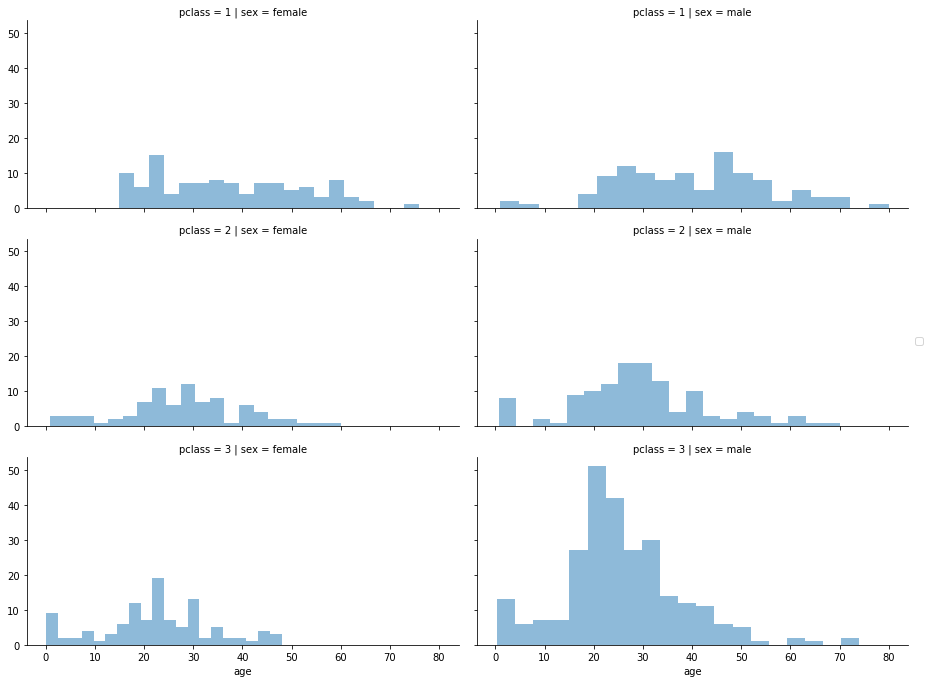

In [12]:
grid = sns.FacetGrid(data, row='pclass', col='sex', size=3.2, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

In [13]:
data["sex"] = data["sex"].replace("male",0)
data["sex"] = data["sex"].replace("female",1)
data.head()

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,1,3,"Nysten, Miss. Anna Sofia",1,22.0,0,0,347081,7.7500,NaN,S,NaN
1,1,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,NaN
2,2,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",1,19.0,1,0,11967,91.0792,B49,C,"Dowagiac, MI"
3,3,0,3,"Saad, Mr. Khalil",0,25.0,0,0,2672,7.2250,NaN,C,NaN
4,4,0,3,"Fox, Mr. Patrick",0,NaN,0,0,368573,7.7500,NaN,Q,"Ireland New York, NY"


In [14]:
estimate = np.array([[0,0,0],[0,0,0]])

for i in range(0, 2):
    for j in range(0, 3):
        ages = data[(data['sex'] == i) & (data['pclass'] == j+1)]['age'].dropna()
        estimate[i][j] = ages.median()
#        display(estimate)
#        display(i,j)

estimate       

# Men in 1st class - 40 y.o.
# Women in 3rd class - 22 y.o

array([[40, 29, 25],
       [35, 28, 22]])

In [15]:
for i in range(0, 2):
    for j in range(0, 3):
        data.loc[(data.age.isnull()) & (data.sex == i) & (data.pclass == j+1),'age'] = estimate[i,j]
        
# Cool way how to fill zero values with predefined ones

#### 2.1.4_Final_Check_of_NaNs

In [16]:
display(data.loc[ data.age.isnull()])

data.isna().sum()

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest


ID             0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        773
embarked       0
home.dest    435
dtype: int64

### 2.2_Adding_Variables

#### 2.2.1_Familysize
* Number of Siblings + Number of Parents + 1
 * Equal to:
* Spouses + Children + 1 



In [17]:
data["familysize"] = data["sibsp"]+data["parch"]+1

# Control:

display(data[data["name"].str.contains("Goodwin")])

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,familysize
58,58,0,3,"Goodwin, Master. Sidney Leonard",0,1.0,5,2,CA 2144,46.9,NaN,S,"Wiltshire, England Niagara Falls, NY",8
136,136,0,3,"Goodwin, Master. Harold Victor",0,9.0,5,2,CA 2144,46.9,NaN,S,"Wiltshire, England Niagara Falls, NY",8
167,167,0,3,"Goodwin, Miss. Jessie Allis",1,10.0,5,2,CA 2144,46.9,NaN,S,"Wiltshire, England Niagara Falls, NY",8
820,820,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",1,43.0,1,6,CA 2144,46.9,NaN,S,"Wiltshire, England Niagara Falls, NY",8


#### I divided family size into 4 groups:
* Single person = 0
* Pair/Couple  = 1
* 3-5 person = 2
* 6-11 person = 3

Reasoning: We are not interested in particular effect of one additional person in family, we are interested in an effect of being in a specific size of group of oeople

In [18]:
data.loc[ data['familysize'] == 1, 'familysize'] = 0
data.loc[ data['familysize'] == 2,  'familysize'] = 1
data.loc[(data['familysize'] > 2) & (data['familysize'] <= 5), 'familysize'] = 2
data.loc[ data['familysize'] > 5, 'familysize'] = 3

#### 2.2.2_Age_category
* I divided Ages into categories 0-15, 16-30, 31-45, 46-60, 60+
* I think it is a reasonable choice because there are very few people of age 75-80 anyway, see Histogram in section 3

In [19]:
data.loc[ data['age'] <= 15, 'age'] = 0
data.loc[(data['age'] > 15) & (data['age'] <= 30), 'age'] = 1
data.loc[(data['age'] > 30) & (data['age'] <= 45), 'age'] = 2
data.loc[(data['age'] > 45) & (data['age'] <= 60), 'age'] = 3
data.loc[ data['age'] > 60, 'age'] = 4

##### Rounding Fare and Age

In [20]:
data["fare"] = round( data["fare"],1)
data["age"] = round( data["age"],0)

### 2.3_Data_Types

In [21]:
data.dtypes

ID              int64
survived        int64
pclass          int64
name           object
sex             int64
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked       object
home.dest      object
familysize      int64
dtype: object

In [22]:
data['age'] = data['age'].astype(int)

### 2.4_Dropping_Variables

In [23]:
data = data.drop(["sibsp","parch", "ticket", "cabin", "home.dest"], axis = 1)

In [24]:
display(data.head(10))
display(data.tail(10))

,ID,survived,pclass,name,sex,age,fare,embarked,familysize
0,0,1,3,"Nysten, Miss. Anna Sofia",1,1,7.8,S,0
1,1,0,3,"Moran, Mr. James",0,1,8.5,Q,0
2,2,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",1,1,91.1,C,1
3,3,0,3,"Saad, Mr. Khalil",0,1,7.2,C,0
4,4,0,3,"Fox, Mr. Patrick",0,1,7.8,Q,0
5,5,0,1,"Widener, Mr. Harry Elkins",0,1,211.5,C,2
6,6,1,1,"Fortune, Miss. Alice Elizabeth",1,1,263.0,S,3
7,7,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",1,1,16.1,S,1
8,8,0,3,"Nysveen, Mr. Johan Hansen",0,4,6.2,S,0
9,9,0,3,"Rice, Master. George Hugh",0,0,29.1,Q,3


,ID,survived,pclass,name,sex,age,fare,embarked,familysize
990,990,0,3,"Sage, Mrs. John (Annie Bullen)",1,1,69.6,S,3
991,991,1,1,"Sloper, Mr. William Thompson",0,1,35.5,S,0
992,992,0,1,"Long, Mr. Milton Clyde",0,1,30.0,S,0
993,993,1,1,"Snyder, Mr. John Pillsbury",0,1,82.3,S,1
994,994,0,3,"Lane, Mr. Patrick",0,1,7.8,Q,0
995,995,1,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",1,3,79.2,C,2
996,996,1,2,"Laroche, Miss. Simonne Marie Anne Andree",1,0,41.6,C,2
997,997,1,3,"Jermyn, Miss. Annie",1,1,7.8,Q,0
998,998,1,3,"Kennedy, Mr. John",0,1,7.8,Q,0
999,999,0,1,"Smart, Mr. John Montgomery",0,3,26.6,S,0


## 3_Histograms,Probabilities,Correlations

### 3.1_Histograms

#### Most of the people were between 15 and 30 years of Age.

(array([ 84., 562., 234.,  93.,  27.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

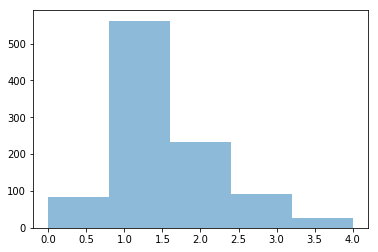

In [25]:
plt.hist( 'age', data = data,alpha=.5, bins = 5)

#### Most of the people were in the third class

(array([248., 217., 535.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 3 Patch objects>)

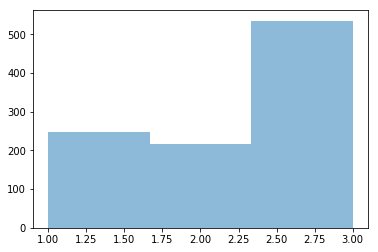

In [26]:
plt.hist( 'pclass', data = data,alpha=.5, bins = 3)

#### Most of the people bought cheaper tickets

(array([768., 102.,  64.,  20.,  15.,   0.,  16.,  13.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.]),
 array([  0.        ,  34.15333333,  68.30666667, 102.46      ,
        136.61333333, 170.76666667, 204.92      , 239.07333333,
        273.22666667, 307.38      , 341.53333333, 375.68666667,
        409.84      , 443.99333333, 478.14666667, 512.3       ]),
 <a list of 15 Patch objects>)

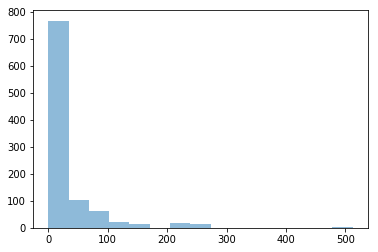

In [27]:
plt.hist( 'fare', data = data,alpha=.5, bins = 15)

#### Most of the people traveled alone

(array([612., 178., 170.,  40.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

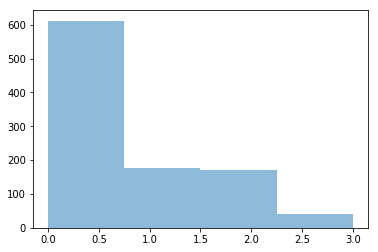

In [28]:
plt.hist( 'familysize', data = data,alpha=.5, bins = 4)

### 3.2_Probabilities

In [29]:
data[['familysize', 'survived']].groupby(['familysize'], as_index=False).mean()

,familysize,survived
0,0,0.315359
1,1,0.567416
2,2,0.588235
3,3,0.150000


In [30]:
data[['sex', 'survived']].groupby(['sex'], as_index=False).mean()

,sex,survived
0,0,0.192429
1,1,0.759563


In [31]:
data[['age', 'survived']].groupby(['age'], as_index=False).mean()

,age,survived
0,0,0.595238
1,1,0.341637
2,2,0.457265
3,3,0.483871
4,4,0.222222


In [32]:
data[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean()

,pclass,survived
0,1,0.645161
1,2,0.447005
2,3,0.267290


### 3.3_Correlations

In [33]:
data_corr = data.drop("ID", axis =1).corr()

# Alternatively:
# data2 = pd.DataFrame(list(zip(data["survived"], data["pclass"],data["sex"],data["age"],data["fare"],data["familysize"] )))

data_corr

,survived,pclass,sex,age,fare,familysize
survived,1.000000,-0.321414,0.557654,-0.004217,0.247517,0.144616
pclass,-0.321414,1.000000,-0.156351,-0.436975,-0.573281,-0.038614
sex,0.557654,-0.156351,1.000000,-0.011013,0.223132,0.229353
age,-0.004217,-0.436975,-0.011013,1.000000,0.206659,-0.167022
fare,0.247517,-0.573281,0.223132,0.206659,1.000000,0.265234
familysize,0.144616,-0.038614,0.229353,-0.167022,0.265234,1.000000


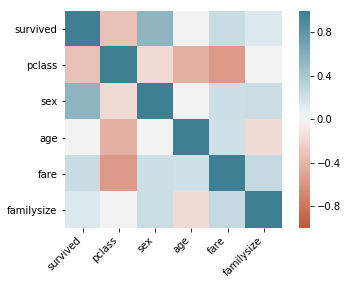

In [34]:
ax = sns.heatmap(
    data_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### Reasonable correlations:
* Fare and PClass are strongly negatively correlated (-0.57) (more expensive ticket, lower number of class = better class)
* Sex and Survived are higly positively correlated (0.55) (women survived much likely than men, 76 % instead of 19 %)

In [35]:
display(abs(data_corr.iloc[0]).sort_values( ascending = False))

survived      1.000000
sex           0.557654
pclass        0.321414
fare          0.247517
familysize    0.144616
age           0.004217
Name: survived, dtype: float64

## 4_Model

### 4.1_Train_and_Test

In [36]:
data.describe()

,ID,survived,pclass,sex,age,fare,familysize
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,499.500000,0.400000,2.287000,0.36600,1.417000,33.60740,0.638000
std,288.819436,0.490143,0.837456,0.48195,0.871706,50.69191,0.900982
min,0.000000,0.000000,1.000000,0.00000,0.000000,0.00000,0.000000
25%,249.750000,0.000000,2.000000,0.00000,1.000000,7.90000,0.000000
50%,499.500000,0.000000,3.000000,0.00000,1.000000,14.50000,0.000000
75%,749.250000,1.000000,3.000000,1.00000,2.000000,31.30000,1.000000
max,999.000000,1.000000,3.000000,1.00000,4.000000,512.30000,3.000000


In [37]:
random.seed( 666 )

In [38]:
TRAIN, TEST = train_test_split(data, test_size = 0.2)

In [39]:
train = TRAIN.copy()
test = TEST.copy()

In [40]:
train = train[["survived", "pclass", "sex", "age", "fare", "familysize"]]
train.head()

,survived,pclass,sex,age,fare,familysize
563,1,1,1,2,134.5,0
92,0,2,1,1,13.0,2
663,0,3,0,1,39.7,3
572,1,1,1,2,27.7,0
649,0,3,0,1,14.5,1


In [41]:
test = test[["survived", "pclass", "sex", "age", "fare", "familysize"]]
test.head()

,survived,pclass,sex,age,fare,familysize
336,1,3,1,1,7.7,0
927,0,3,0,2,8.0,0
543,1,2,0,0,32.5,2
831,1,2,1,1,12.6,0
503,0,3,0,1,9.2,0


In [42]:
X_train = train.drop("survived", axis=1)
Y_train = train["survived"]

X_test = test.drop("survived", axis=1)
Y_test = test["survived"]


X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((800, 5), (800,), (200, 5), (200,))

### 4.2_Results

In [43]:
# Train Dataset

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

round(decision_tree.score(X_train, Y_train) * 100, 2)

# The score is 91.75 % Accuracy on Train data

92.25

In [50]:
# Test Dataset

test_pred = decision_tree.predict(X_test)

(test_pred == Y_test).sum()/len(X_test)

# The score is 78.5 % Accuracy on Test data

0.785

#### Note about Split:
* Split 80:20 seems to be the best choice as it provides the highest accuracy for our test dataset

## 5_Predictions_of_Results

### 5.1_Loading_Data

In [45]:
eval = pd.read_csv (r'evaluation.csv')
eval.head()

,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1000,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,"Haverford, PA / Cooperstown, NY"
1,1001,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S,"Bulgaria Chicago, IL"
2,1002,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q,NaN
3,1003,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,NaN
4,1004,3,"Wittevrongel, Mr. Camille",male,36.0,0,0,345771,9.5000,NaN,S,NaN


### 5.2_Missing_Values

In [46]:
eval

eval.isna().sum()

eval["sex"] = eval["sex"].replace("male",0)
eval["sex"] = eval["sex"].replace("female",1)

estimate = np.array([[0,0,0],[0,0,0]])

for i in range(0, 2):
    for j in range(0, 3):
        ages = eval[(eval['sex'] == i) & (eval['pclass'] == j+1)]['age'].dropna()
        estimate[i][j] = ages.median()
#        display(estimate)
#        display(i,j)

display(estimate)

# Men in 1st class - 44 y.o.
# Women in 3rd class - 19 y.o.


for i in range(0, 2):
    for j in range(0, 3):
        eval.loc[(eval.age.isnull()) & (eval.sex == i) & (eval.pclass == j+1),'age'] = estimate[i,j]
        
eval.isna().sum()


array([[44, 34, 26],
       [36, 24, 19]])

ID             0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        241
embarked       0
home.dest    129
dtype: int64

### 5.3_Adding_Variables

In [47]:
eval["familysize"] = eval["sibsp"]+eval["parch"]+1

eval.loc[ eval['familysize'] == 1, 'familysize'] = 0
eval.loc[ eval['familysize'] == 2,  'familysize'] = 1
eval.loc[(eval['familysize'] > 2) & (eval['familysize'] <= 5), 'familysize'] = 2
eval.loc[ eval['familysize'] > 5, 'familysize'] = 3


eval.loc[ eval['age'] <= 15, 'age'] = 0
eval.loc[(eval['age'] > 15) & (eval['age'] <= 30), 'age'] = 1
eval.loc[(eval['age'] > 30) & (eval['age'] <= 45), 'age'] = 2
eval.loc[(eval['age'] > 45) & (eval['age'] <= 60), 'age'] = 3
eval.loc[ eval['age'] > 60, 'age'] = 4


eval["fare"] = round( eval["fare"],1)
eval["age"] = round( eval["age"],0)

eval['age'] = eval['age'].astype(int)

eval = eval.drop(["sibsp","parch", "ticket", "cabin", "home.dest"], axis = 1)

#display(eval.head(10))
#display(eval.tail(10))

### 5.4_Predictions

In [48]:
eval_predict = eval[["pclass", "sex", "age", "fare", "familysize"]]

predicted = decision_tree.predict(eval_predict)

In [49]:
eval["prediction"] = predicted
eval = eval[["ID", "prediction"]]

eval.to_csv(r'results.csv')